# Principle Component Analysis and Regression Study of the Walmart Sales dataset

#### Importing Libraries

In [28]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing,svm 
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection,metrics 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,KFold,cross_val_score,cross_val_predict

In [53]:
data_whole = 'train.csv'
data = pd.read_csv(data_whole)
df1 = data
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,26,92,2011-08-26,87235.57,False,61.10,3.796,NaN,NaN,NaN,NaN,NaN,136.213613,7.767,A,152513
1,34,22,2011-03-25,5945.97,False,53.11,3.480,NaN,NaN,NaN,NaN,NaN,128.616064,10.398,A,158114
2,21,28,2010-12-03,1219.89,False,50.43,2.708,NaN,NaN,NaN,NaN,NaN,211.265543,8.163,B,140167
3,8,9,2010-09-17,11972.71,False,75.32,2.582,NaN,NaN,NaN,NaN,NaN,214.878556,6.315,A,155078
4,19,55,2012-05-18,8271.82,False,58.81,4.029,12613.98,NaN,11.5,1705.28,3600.79,138.106581,8.150,A,203819


In [30]:
data.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
dtype: object

In [31]:
data.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       181931
MarkDown2       208219
MarkDown3       190930
MarkDown4       192420
MarkDown5       181422
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [32]:
data = data.assign(md1_present = data.MarkDown1.notnull())
data = data.assign(md2_present = data.MarkDown2.notnull())
data = data.assign(md3_present = data.MarkDown3.notnull())
data = data.assign(md4_present = data.MarkDown4.notnull())
data = data.assign(md5_present = data.MarkDown5.notnull())
data.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       181931
MarkDown2       208219
MarkDown3       190930
MarkDown4       192420
MarkDown5       181422
CPI                  0
Unemployment         0
Type                 0
Size                 0
md1_present          0
md2_present          0
md3_present          0
md4_present          0
md5_present          0
dtype: int64

In [33]:
data.fillna(0, inplace=True)

In [34]:
data['Type'] = 'Type_' + data['Type'].map(str)
data['Store'] = 'Store_' + data['Store'].map(str)
data['Dept'] = 'Dept_' + data['Dept'].map(str)
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,Type,Size,md1_present,md2_present,md3_present,md4_present,md5_present
0,Store_26,Dept_92,2011-08-26,87235.57,False,61.10,3.796,0.00,0.0,0.0,...,0.00,136.213613,7.767,Type_A,152513,False,False,False,False,False
1,Store_34,Dept_22,2011-03-25,5945.97,False,53.11,3.480,0.00,0.0,0.0,...,0.00,128.616064,10.398,Type_A,158114,False,False,False,False,False
2,Store_21,Dept_28,2010-12-03,1219.89,False,50.43,2.708,0.00,0.0,0.0,...,0.00,211.265543,8.163,Type_B,140167,False,False,False,False,False
3,Store_8,Dept_9,2010-09-17,11972.71,False,75.32,2.582,0.00,0.0,0.0,...,0.00,214.878556,6.315,Type_A,155078,False,False,False,False,False
4,Store_19,Dept_55,2012-05-18,8271.82,False,58.81,4.029,12613.98,0.0,11.5,...,3600.79,138.106581,8.150,Type_A,203819,True,False,True,True,True


#### Creating Dummies

In [35]:
type_dummies = pd.get_dummies(data['Type'])
store_dummies = pd.get_dummies(data['Store'])
dept_dummies = pd.get_dummies(data['Dept'])

#### Adding dummies to the main dataset

In [36]:
data = pd.concat([data,type_dummies,store_dummies,dept_dummies],axis=1)
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99
0,Store_26,Dept_92,2011-08-26,87235.57,False,61.10,3.796,0.00,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,Store_34,Dept_22,2011-03-25,5945.97,False,53.11,3.480,0.00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,Store_21,Dept_28,2010-12-03,1219.89,False,50.43,2.708,0.00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,Store_8,Dept_9,2010-09-17,11972.71,False,75.32,2.582,0.00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,Store_19,Dept_55,2012-05-18,8271.82,False,58.81,4.029,12613.98,0.0,11.5,...,0,0,0,0,0,0,0,0,0,0


#### Deleting columns

In [37]:
del data['Store']
del data['Dept']
del data['Date']
del data['Type']

In [40]:
correl = data.corr(method = 'pearson').round(3)
correl

,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99
Weekly_Sales,1.000,0.012,-0.001,0.003,0.050,0.020,0.036,0.038,0.051,-0.022,...,0.163,0.098,0.322,0.059,0.089,0.296,-0.004,-0.009,-0.048,-0.032
IsHoliday,0.012,1.000,-0.157,-0.077,-0.002,0.209,0.264,0.014,-0.015,-0.003,...,0.001,-0.001,-0.000,-0.000,-0.000,-0.001,-0.000,-0.001,0.000,0.005
Temperature,-0.001,-0.157,1.000,0.141,-0.026,-0.179,-0.057,-0.051,-0.015,0.181,...,0.003,0.003,0.006,0.001,0.004,0.003,0.008,0.003,0.000,0.005
Fuel_Price,0.003,-0.077,0.141,1.000,0.299,0.030,0.019,0.168,0.213,-0.164,...,0.000,-0.001,0.001,0.003,0.000,-0.000,0.000,0.001,0.004,0.022
MarkDown1,0.050,-0.002,-0.026,0.299,1.000,0.174,-0.014,0.839,0.411,0.012,...,-0.002,-0.003,-0.002,-0.001,-0.001,-0.002,-0.001,-0.002,-0.000,0.039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dept_95,0.296,-0.001,0.003,-0.000,-0.002,-0.001,-0.000,-0.001,-0.000,0.002,...,-0.016,-0.016,-0.015,-0.015,-0.015,1.000,-0.013,-0.015,-0.015,-0.006
Dept_96,-0.004,-0.000,0.008,0.000,-0.001,0.000,-0.001,-0.001,0.001,-0.001,...,-0.014,-0.014,-0.013,-0.013,-0.013,-0.013,1.000,-0.013,-0.013,-0.005
Dept_97,-0.009,-0.001,0.003,0.001,-0.002,-0.000,-0.000,0.000,-0.002,-0.003,...,-0.015,-0.015,-0.015,-0.015,-0.014,-0.015,-0.013,1.000,-0.015,-0.006
Dept_98,-0.048,0.000,0.000,0.004,-0.000,0.000,0.002,-0.000,0.000,-0.005,...,-0.015,-0.015,-0.015,-0.014,-0.014,-0.015,-0.013,-0.015,1.000,-0.005


#### Creating training and testing dataset

In [42]:
train = data.iloc[:282451]
test = data.iloc[282451:]
test = test.drop('Weekly_Sales',axis=1) #removing unusable values from test

#creating numpy arrays out of the pandas dataframe; we can ask for a columns, or dataframes values

Y = train['Weekly_Sales']
X = train.drop('Weekly_Sales',axis=1)

#### Fitting into Linear Regression model

In [43]:
lr = linear_model.LinearRegression()
lr.fit(X, Y)

Y_pred = lr.predict(X)

#### MSE and $R^2$

In [51]:
#MSE
mse1 = np.sqrt(round(metrics.mean_squared_error(Y_pred,Y),3))
print('MSE for Model 1 is:',mse1)

#R^2 
r2 = metrics.r2_score(Y,Y_pred)
print('R\N{SUPERSCRIPT TWO} for Model 1 is:',r2)

MSE for Model 1 is: 13220.803775489598
R² for Model 1 is: 0.6596266338722205


In [54]:
#creating a dataframe for numerical features
data2 = df1.drop(['IsHoliday', 'Type','Date'],axis=1)
print(data2.shape)

#create a dataframe for categorical features
transform =pd.DataFrame(df1,columns=['Type'])
dummies1=pd.get_dummies(df1['IsHoliday'])
dummies1.rename(columns={True:'IsHoliday_1',False:'IsHoliday_0'},inplace=True)
dummies = pd.get_dummies(transform)

(282451, 13)


## Principle Component Analysis feasibility study

#### Data Transformation

In [56]:
data_transform = pd.concat([data2,dummies1,dummies],axis=1)
data_transform.head()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,IsHoliday_0,IsHoliday_1,Type_A,Type_B,Type_C
0,26,92,87235.57,61.10,3.796,NaN,NaN,NaN,NaN,NaN,136.213613,7.767,152513,1,0,1,0,0
1,34,22,5945.97,53.11,3.480,NaN,NaN,NaN,NaN,NaN,128.616064,10.398,158114,1,0,1,0,0
2,21,28,1219.89,50.43,2.708,NaN,NaN,NaN,NaN,NaN,211.265543,8.163,140167,1,0,0,1,0
3,8,9,11972.71,75.32,2.582,NaN,NaN,NaN,NaN,NaN,214.878556,6.315,155078,1,0,1,0,0
4,19,55,8271.82,58.81,4.029,12613.98,NaN,11.5,1705.28,3600.79,138.106581,8.150,203819,1,0,1,0,0


In [57]:
data_transform.Type_C

0         0
1         0
2         0
3         0
4         0
         ..
282446    0
282447    0
282448    0
282449    0
282450    0
Name: Type_C, Length: 282451, dtype: uint8

In [58]:
data_transform.fillna(0,inplace=True)

In [59]:
features = ['Store', 'Dept', 'Temperature', 'Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5',
            'CPI','Unemployment','Size','IsHoliday_0','IsHoliday_1','Type_A','Type_B','Type_C']

In [60]:
X_Train=data_transform[features]
X_Actual=data_transform['Weekly_Sales']

In [61]:
scaler = StandardScaler()
#fitting on training set only
scaler.fit(X_Train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [62]:
train_transform = scaler.transform(X_Train)

In [63]:
train_transform[1]

array([ 0.92369954, -0.73060713, -0.37967408,  0.26101146, -0.42810274,
       -0.17176531, -0.08388145, -0.27806187, -0.3902481 , -1.08761323,
        1.30075795,  0.35054347,  0.27470531, -0.27470531,  0.97666802,
       -0.79517683, -0.33486476])

## Eigen Value Decomposition for PCA considering 95% of variance

In [64]:
from sklearn.decomposition import PCA
pca = PCA(.95) #taking 95% of variance into account

In [67]:
pca.fit(train_transform) #train_transform is the dataframe containg all the variables for ex 80

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [68]:
train_transform = pca.transform(train_transform) #projecting the variables into new space

In [69]:
pca.explained_variance_ratio_

array([0.16581629, 0.13564292, 0.12591076, 0.10549754, 0.07997383,
       0.06628173, 0.05991339, 0.0569776 , 0.05419934, 0.04681699,
       0.0425015 , 0.03073728])

In [70]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

#### Plot showing the components required to explain the required variability

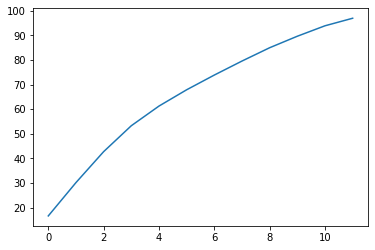

In [71]:
import matplotlib.pyplot as plt
plt.plot(var1)
plt.show()

#### Training and Testing dataset split

In [75]:
X_train, X_test , y_train, y_test = train_test_split(train_transform,X_Actual, test_size=.15, random_state = 3)

lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [76]:
y_train

117638     7684.54
171337    40389.62
31402      2864.63
80260       621.00
175053       52.35
            ...   
11261     37748.22
48056      2626.06
77049      2573.43
198296     2282.33
71530       579.99
Name: Weekly_Sales, Length: 240083, dtype: float64

#### MSE and $R^2$ of PCA model

In [77]:
#MSE of PCA model
mse1 = np.sqrt(round(metrics.mean_squared_error(y_test,y_pred),3))
print('MSE for Model 1 is:',mse1)

#R^2 of PCA model
r2 = metrics.r2_score(y_test,y_pred)
print('R\N{SUPERSCRIPT TWO} for Model 1 is:',r2)

MSE for Model 1 is: 21814.94063565152
R² for Model 1 is: 0.0814771567883853


# The feasibility study shows that the $R^2$ is significantly low for Linear Regression at 62% and PCA + Linear Regression at 8.1%. In conclusion it could be said that time series dataset is not good for Linear Regression and PCA + Linear Regression.